In [6]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import os
import sys
import plotly.graph_objects as go 
from scipy.optimize import curve_fit
dir_path = os.path.abspath('')
sys.path.append(dir_path + '/../')
from labbiofisica import Interpolazione, final_val

In [7]:
def fit_exponent(t,T0,t0,ΔT1,τ1):
    exp1 = (t-t0)/τ1
    result = np.where(
        t < t0,
        T0,
        T0 + ΔT1 * (1 - np.exp(-exp1))
    )
    return result

In [8]:
SHEETS = ['50mW','50mW2','210mW','210mW2','410mW','410mW2','620mW','850mW','1000mW2','1000mW3','Foglio8','Foglio10'] # 1000mW1 è quello per il doppio esponenziale

results = []

for sheet in SHEETS:
    data = pd.read_excel('./data/gruppo1_termocamera.xlsx', sheet_name=sheet, header=12, skiprows=['A', 'B', 'C'])
    t = data['Base tempo relativa'].to_numpy()
    T = data['Sp1.Valore'].to_numpy()
    popt, pcov = curve_fit(fit_exponent, t, T, p0=[25, 5, 10, 86])  # Initial guesses for T0, t0, ΔT1, τ1
    
    T0, t0, DeltaT, tau = popt
    sigmaT0, sigmat0, sigmaDelta, sigmatau = np.sqrt(np.diag(pcov))
    
    results.append({
        'Sheet': sheet,
        'T0': T0,
        't0': t0,
        'DeltaT': DeltaT,
        'tau': tau,
        'sigmaT0': sigmaT0,
        'sigmat0': sigmat0,
        'sigmaDelta': sigmaDelta,
        'sigmatau': sigmatau
    })

# Create a pandas DataFrame to store the results
results_df = pd.DataFrame(results)

display(results_df)

,Sheet,T0,t0,DeltaT,tau,sigmaT0,sigmat0,sigmaDelta,sigmatau
0,50mW,25.615319,35.197207,2.615694,55.208337,0.004678,0.205833,0.007930,0.483593
1,50mW2,25.720746,35.865007,2.274731,33.695270,0.004391,0.156930,0.005328,0.262085
2,210mW,25.293602,30.783952,12.648967,50.242992,0.010259,0.083483,0.014259,0.165214
3,210mW2,25.296021,40.356606,12.644466,50.284927,0.008122,0.072325,0.012310,0.151365
4,410mW,25.382406,36.967704,23.335666,46.534923,0.013659,0.063057,0.021743,0.134855
5,410mW2,25.541639,21.914578,24.259008,52.299224,0.020355,0.076792,0.023851,0.129166
6,620mW,25.690254,38.503493,33.668403,37.375946,0.005623,0.018656,0.042363,0.100101
7,850mW,26.011814,28.757896,39.565873,47.151604,0.028988,0.068463,0.038452,0.132113
8,1000mW2,25.573515,31.223284,39.817642,47.915358,0.027190,0.066777,0.035071,0.124361
9,1000mW3,26.011814,28.757896,39.565873,47.151604,0.028988,0.068463,0.038452,0.132113


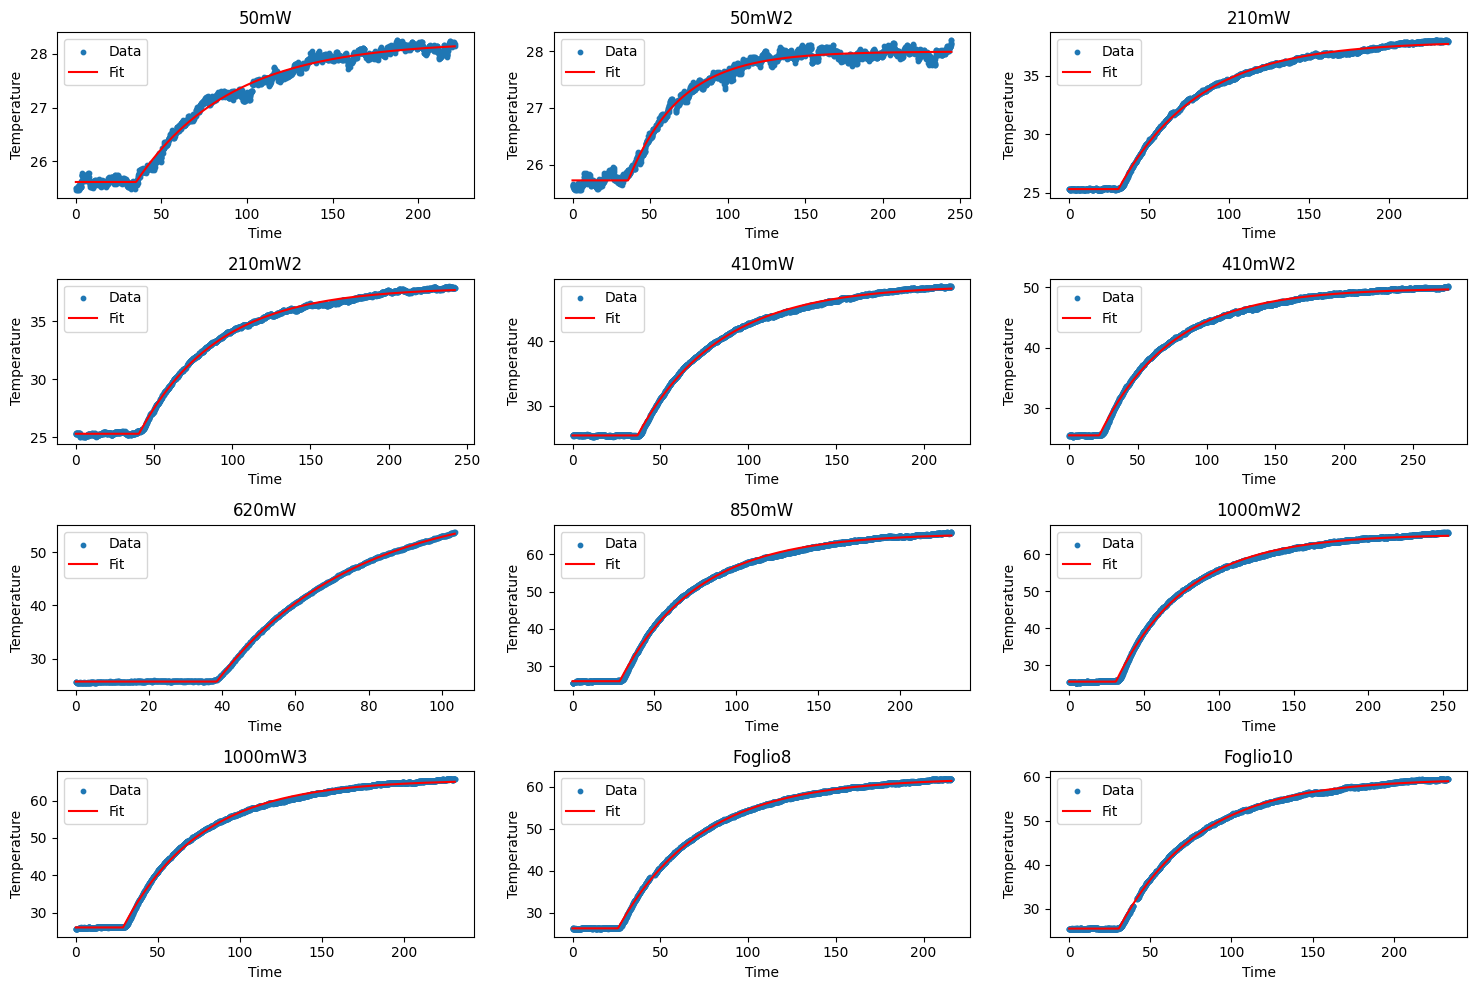

In [9]:
# Plot all the fits
plt.figure(figsize=(15, 10))

for i, sheet in enumerate(SHEETS):
    data = pd.read_excel('./data/gruppo1_termocamera.xlsx', sheet_name=sheet, header=12, skiprows=['A', 'B', 'C'])
    t = data['Base tempo relativa'].to_numpy()
    T = data['Sp1.Valore'].to_numpy()
    
    # Retrieve the fit parameters for the current sheet
    params = results_df.loc[results_df['Sheet'] == sheet]
    T0, t0, DeltaT, tau = params[['T0', 't0', 'DeltaT', 'tau']].values[0]
    
    # Generate the fitted curve
    t_fit = np.linspace(t.min(), t.max(), 500)
    T_fit = fit_exponent(t_fit, T0, t0, DeltaT, tau)
    
    # Plot the data and the fit
    plt.subplot(4, 3, i + 1)
    plt.scatter(t, T, label='Data', s=10)
    plt.plot(t_fit, T_fit, label='Fit', color='red')
    plt.title(sheet)
    plt.xlabel('Time')
    plt.ylabel('Temperature')
    plt.legend()

plt.tight_layout()
plt.show()